In [1]:
#Importações 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST, CIFAR10

#Importações para visualização
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as pyo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#Dispositivo utilizado
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
#Tensor de 1 dimensão
tensor_1d = torch.tensor([1, 2, 3, 4, 5])
print(f"Tensor 1D: {tensor_1d}, Shape: {tensor_1d.shape}")

#Tensor de 2 dimensões
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Tensor 2D: \n{tensor_2d}\nShape: {tensor_2d.shape}")

#Tensor de 3 dimensões, como nas imagens
tensor_3d = torch.randn(3, 64, 64) 
print(f"Tensor 3D Shape: {tensor_3d.shape}")

#Operação de tensores
a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
b = torch.tensor([[2.0, 1.0], [1.0, 2.0]])

print(f"\nTensor A:\n{a}")
print(f"Tensor B:\n{b}")
print(f"Multiplicação elemento por elemento:\n{a * b}")
print(f"Multiplicação matricial:\n{torch.matmul(a, b)}")
print(f"Soma:\n{a + b}")

Tensor 1D: tensor([1, 2, 3, 4, 5]), Shape: torch.Size([5])
Tensor 2D: 
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])
Tensor 3D Shape: torch.Size([3, 64, 64])

Tensor A:
tensor([[1., 2.],
        [3., 4.]])
Tensor B:
tensor([[2., 1.],
        [1., 2.]])
Multiplicação elemento por elemento:
tensor([[2., 2.],
        [3., 8.]])
Multiplicação matricial:
tensor([[ 4.,  5.],
        [10., 11.]])
Soma:
tensor([[3., 3.],
        [4., 6.]])


In [3]:
class BasicNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation='relu'):
        super().__init__()

        #Um dicionário que mapeia o nome da ativação
        activation_map = {
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
            'sigmoid': nn.Sigmoid()
        }

        layers = []
        prev_size = input_size
        
        #Loop para criar as camadas ocultas.
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size)) #Adiciona uma camada linear
            layers.append(activation_map[activation]) #Adiciona a função de ativação escolhida
            prev_size = hidden_size #Atualiza o 'prev_size' para ser o tamanho da camada atual,
            
        layers.append(nn.Linear(prev_size, output_size)) #Adiciona a camada de saída final, que não tem função de ativação aqui
        
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

#Cria instâncias com diferentes funções de ativação
models = {
    'ReLU': BasicNeuralNetwork(2, [8, 4], 1, 'relu'),
    'Tanh': BasicNeuralNetwork(2, [8, 4], 1, 'tanh'),
    'Sigmoid': BasicNeuralNetwork(2, [8, 4], 1, 'sigmoid')
}

#X é entrada e y é saída
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

print("Arquiteturas criadas:")
for name, model in models.items():
    print(f"\n--- Rede com {name} ---")
    print(model)
    
    with torch.no_grad():
        # Passa os dados de entrada pelo modelo para obter uma saída.
        output = model(X)
        print(f"Formato da Saída (Output shape): {output.shape}")

Arquiteturas criadas:

--- Rede com ReLU ---
BasicNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)
Formato da Saída (Output shape): torch.Size([4, 1])

--- Rede com Tanh ---
BasicNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Tanh()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): Tanh()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)
Formato da Saída (Output shape): torch.Size([4, 1])

--- Rede com Sigmoid ---
BasicNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)
Formato da Saída (Output 

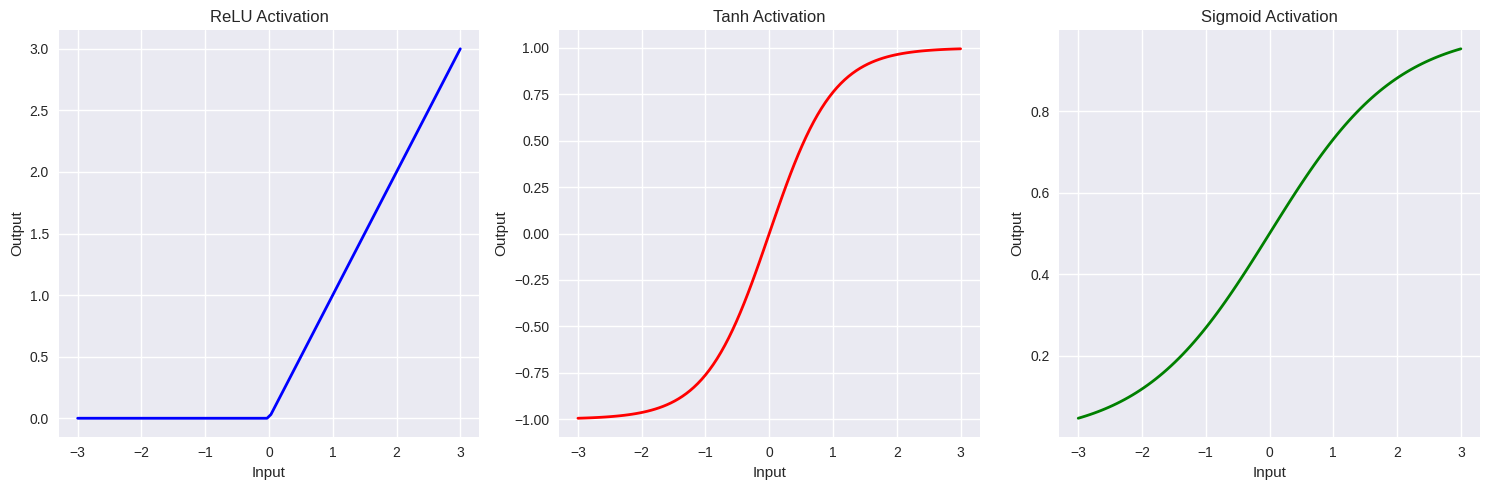

Características das funções de ativação:
ReLU: f(x) = max(0, x) - Evita problema do gradiente desaparecendo
Tanh: f(x) = tanh(x) - Saída entre -1 e 1, zero-centrada
Sigmoid: f(x) = 1/(1+e^-x) - Saída entre 0 e 1, usado para probabilidades


In [4]:
# Comparação de funções de ativação
x = torch.linspace(-3, 3, 100)

plt.figure(figsize=(15, 5))

#ReLU
plt.subplot(1, 3, 1)
relu_output = F.relu(x)
plt.plot(x.numpy(), relu_output.numpy(), 'b-', linewidth=2)
plt.title('ReLU Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

#Tanh
plt.subplot(1, 3, 2)
tanh_output = torch.tanh(x)
plt.plot(x.numpy(), tanh_output.numpy(), 'r-', linewidth=2)
plt.title('Tanh Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

#Sigmoid
plt.subplot(1, 3, 3)
sigmoid_output = torch.sigmoid(x)
plt.plot(x.numpy(), sigmoid_output.numpy(), 'g-', linewidth=2)
plt.title('Sigmoid Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Características das funções de ativação:")
print("ReLU: f(x) = max(0, x) - Evita problema do gradiente desaparecendo")
print("Tanh: f(x) = tanh(x) - Saída entre -1 e 1, zero-centrada")
print("Sigmoid: f(x) = 1/(1+e^-x) - Saída entre 0 e 1, usado para probabilidades")

In [5]:
#Carregamento do dataset FashionMNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #Normalização para [-1, 1]
])

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Dataset carregado:")
print(f"Treino: {len(train_dataset)} amostras")
print(f"Teste: {len(test_dataset)} amostras")
print(f"Classes: {classes}")

Dataset carregado:
Treino: 60000 amostras
Teste: 10000 amostras
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


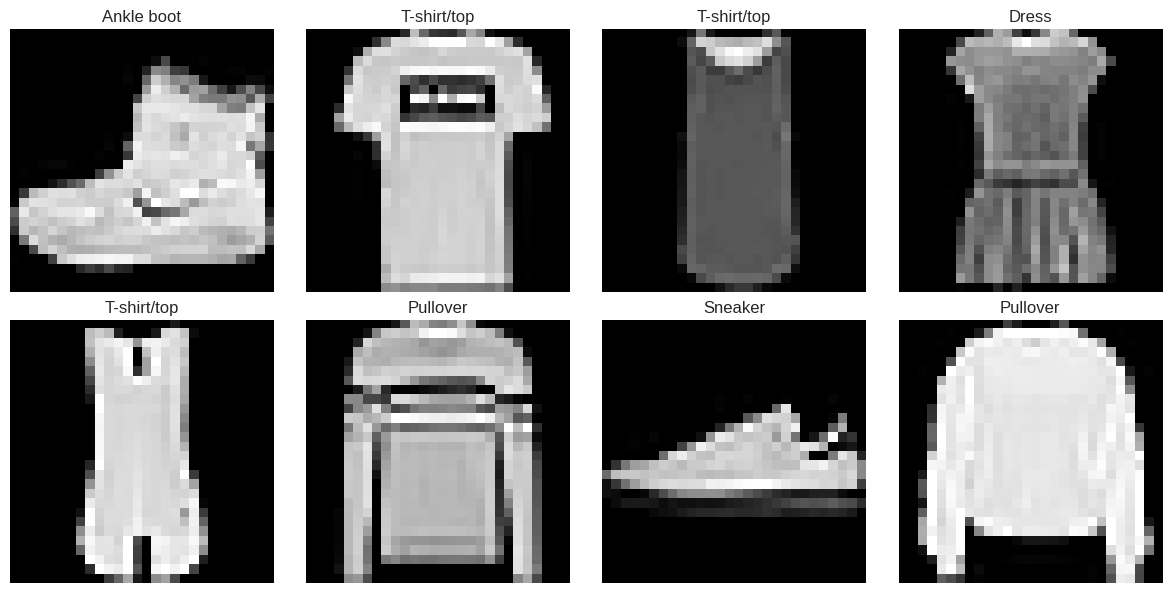


Dimensões da imagem: torch.Size([1, 28, 28])
Tipo de dado: torch.float32
Valor mínimo: -1.000
Valor máximo: 1.000


In [6]:
def show_fashion_samples(dataset, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(num_samples):
        img, label = dataset[i]
        img = img.squeeze().numpy()
        
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'{classes[label]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

show_fashion_samples(train_dataset)

sample_img, sample_label = train_dataset[0]
print(f"\nDimensões da imagem: {sample_img.shape}")
print(f"Tipo de dado: {sample_img.dtype}")
print(f"Valor mínimo: {sample_img.min():.3f}")
print(f"Valor máximo: {sample_img.max():.3f}")

In [16]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(DeepNeuralNetwork, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_size, 512), #Primeira camada
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(512, 256), #Segunda camada
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128), #Terceira camada
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),  #Quarta camada
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, num_classes) #Camada de saída
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) 
        return self.network(x)

#Criando modelo
deep_model = DeepNeuralNetwork().to(device)

#Contar parâmetros
total_params = sum(p.numel() for p in deep_model.parameters())
trainable_params = sum(p.numel() for p in deep_model.parameters() if p.requires_grad)
print(f"\nTotal de parâmetros: {total_params:,}")
print(f"Parâmetros treináveis: {trainable_params:,}")


Total de parâmetros: 575,050
Parâmetros treináveis: 575,050


In [8]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    train_losses = []
    train_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            if batch_idx % 100 == 0:
                print(f'Epoch: {epoch+1}/{epochs}, Batch: {batch_idx}/{len(train_loader)}, '
                      f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        print(f'Epoch {epoch+1} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
    
    return train_losses, train_accuracies

#Configurar treinamento
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(deep_model.parameters(), lr=0.001)

print("Iniciando treinamento da rede neural profunda...")
train_losses, train_accuracies = train_model(deep_model, train_loader, criterion, optimizer, epochs=3)

Iniciando treinamento da rede neural profunda...
Epoch: 1/3, Batch: 0/469, Loss: 2.2999, Acc: 11.72%
Epoch: 1/3, Batch: 100/469, Loss: 0.8380, Acc: 61.05%
Epoch: 1/3, Batch: 200/469, Loss: 0.5869, Acc: 69.13%
Epoch: 1/3, Batch: 300/469, Loss: 0.5021, Acc: 73.10%
Epoch: 1/3, Batch: 400/469, Loss: 0.5762, Acc: 75.28%
Epoch 1 - Loss: 0.6530, Accuracy: 76.29%
Epoch: 2/3, Batch: 0/469, Loss: 0.3614, Acc: 88.28%
Epoch: 2/3, Batch: 100/469, Loss: 0.4004, Acc: 82.97%
Epoch: 2/3, Batch: 200/469, Loss: 0.4158, Acc: 83.47%
Epoch: 2/3, Batch: 300/469, Loss: 0.3662, Acc: 83.94%
Epoch: 2/3, Batch: 400/469, Loss: 0.3471, Acc: 84.14%
Epoch 2 - Loss: 0.4463, Accuracy: 84.23%
Epoch: 3/3, Batch: 0/469, Loss: 0.3462, Acc: 85.94%
Epoch: 3/3, Batch: 100/469, Loss: 0.3714, Acc: 85.41%
Epoch: 3/3, Batch: 200/469, Loss: 0.3712, Acc: 85.53%
Epoch: 3/3, Batch: 300/469, Loss: 0.4458, Acc: 85.70%
Epoch: 3/3, Batch: 400/469, Loss: 0.3586, Acc: 85.65%
Epoch 3 - Loss: 0.4051, Accuracy: 85.61%


In [18]:
class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvolutionalNeuralNetwork, self).__init__()
 
        self.conv_layers = nn.Sequential(
            #Bloco convolucional
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25),
            
            #Bloco convolucional
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25),
            
            #Bloco convolucional
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25)
        )
        
        #Camadas conectadas
        self.classifier = nn.Sequential(
            nn.Linear(128 * 3 * 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

#Criando modelo
cnn_model = ConvolutionalNeuralNetwork().to(device)

#Contar parâmetros
total_params = sum(p.numel() for p in cnn_model.parameters())
print(f"\nTotal de parâmetros da CNN: {total_params:,}")


Total de parâmetros da CNN: 734,314


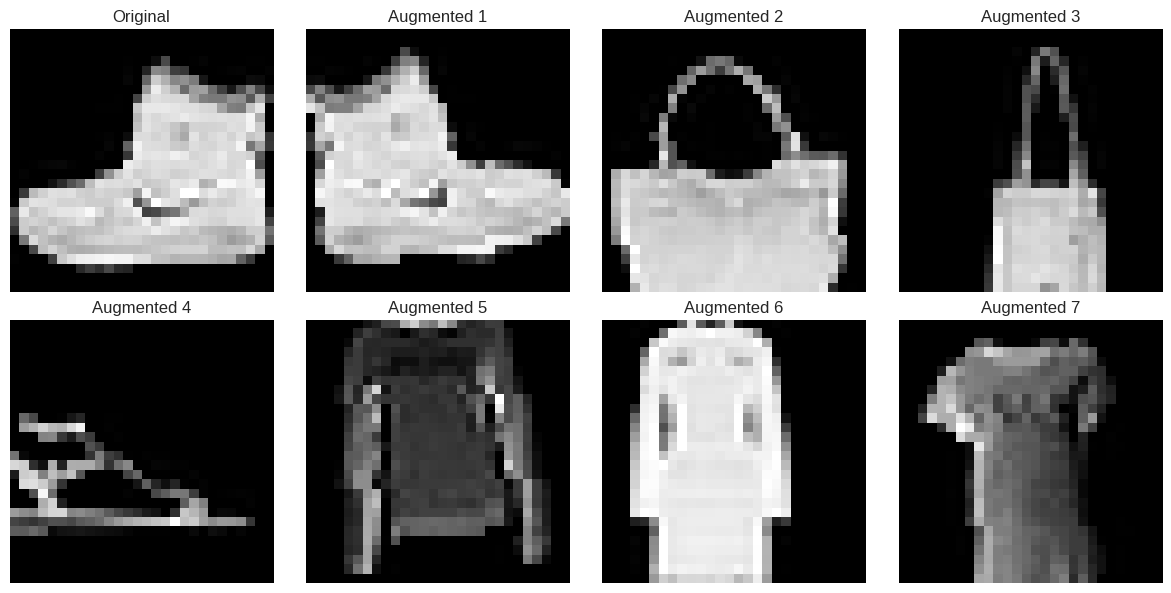

Data Augmentation aplicado: rotação, flip horizontal e translação


In [21]:
augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#Dataset com augmentation
augmented_dataset = FashionMNIST(root='./data', train=True, download=False, transform=augmented_transform)
augmented_loader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)

#Visualizar data augmentation
def show_augmentation_effect(dataset, augmented_dataset, idx=0):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    
    #Imagem original
    original_img, label = dataset[idx]
    axes[0, 0].imshow(original_img.squeeze(), cmap='gray')
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    
    #Imagens augmentadas
    for i in range(7):
        aug_img, _ = augmented_dataset[idx + i * 100]  
        row = (i + 1) // 4
        col = (i + 1) % 4
        axes[row, col].imshow(aug_img.squeeze(), cmap='gray')
        axes[row, col].set_title(f'Augmented {i+1}')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

show_augmentation_effect(train_dataset, augmented_dataset)
print("Data Augmentation aplicado: rotação, flip horizontal e translação")

In [22]:
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

print("Treinando CNN com data augmentation...")
cnn_losses, cnn_accuracies = train_model(cnn_model, augmented_loader, cnn_criterion, cnn_optimizer, epochs=3)

#Função de teste
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            
            # Precisão por classe
            c = (predicted == targets).squeeze()
            for i in range(targets.size(0)):
                label = targets[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    
    accuracy = 100 * correct / total
    print(f'\nPrecisão geral no teste: {accuracy:.2f}%')
    
    #Precisão por classe
    print('\nPrecisão por classe:')
    for i in range(10):
        if class_total[i] > 0:
            print(f'{classes[i]}: {100 * class_correct[i] / class_total[i]:.2f}%')
    
    return accuracy

#Testar CNN
cnn_test_accuracy = test_model(cnn_model, test_loader)

Treinando CNN com data augmentation...
Epoch: 1/3, Batch: 0/469, Loss: 2.3015, Acc: 10.16%
Epoch: 1/3, Batch: 100/469, Loss: 0.7858, Acc: 52.16%
Epoch: 1/3, Batch: 200/469, Loss: 0.7414, Acc: 61.30%
Epoch: 1/3, Batch: 300/469, Loss: 0.6249, Acc: 65.22%
Epoch: 1/3, Batch: 400/469, Loss: 0.3965, Acc: 67.70%
Epoch 1 - Loss: 0.8296, Accuracy: 68.85%
Epoch: 2/3, Batch: 0/469, Loss: 0.5961, Acc: 78.91%
Epoch: 2/3, Batch: 100/469, Loss: 0.5306, Acc: 77.13%
Epoch: 2/3, Batch: 200/469, Loss: 0.5331, Acc: 77.58%
Epoch: 2/3, Batch: 300/469, Loss: 0.5276, Acc: 78.15%
Epoch: 2/3, Batch: 400/469, Loss: 0.6604, Acc: 78.73%
Epoch 2 - Loss: 0.5566, Accuracy: 79.00%
Epoch: 3/3, Batch: 0/469, Loss: 0.4243, Acc: 82.81%
Epoch: 3/3, Batch: 100/469, Loss: 0.4632, Acc: 80.53%
Epoch: 3/3, Batch: 200/469, Loss: 0.4922, Acc: 81.16%
Epoch: 3/3, Batch: 300/469, Loss: 0.6138, Acc: 81.72%
Epoch: 3/3, Batch: 400/469, Loss: 0.4139, Acc: 81.96%
Epoch 3 - Loss: 0.4781, Accuracy: 82.14%

Precisão geral no teste: 87.35%



## 6. Seção 6 - Autoencoders

Implementação de um autoencoder para redução de dimensionalidade e reconstrução de imagens.

In [13]:
# Treinar Autoencoder
def train_autoencoder(model, train_loader, epochs=5):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    model.train()
    losses = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.to(device)
            
            optimizer.zero_grad()
            reconstructed, encoded = model(data)
            loss = criterion(reconstructed, data)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if batch_idx % 100 == 0:
                print(f'Epoch: {epoch+1}/{epochs}, Batch: {batch_idx}/{len(train_loader)}, '
                      f'Loss: {loss.item():.6f}')
        
        epoch_loss = running_loss / len(train_loader)
        losses.append(epoch_loss)
        print(f'Epoch {epoch+1} - Average Loss: {epoch_loss:.6f}')
    
    return losses

print("Treinando Autoencoder...")
ae_losses = train_autoencoder(autoencoder, train_loader, epochs=3)

Treinando Autoencoder...
Epoch: 1/3, Batch: 0/469, Loss: 0.686973
Epoch: 1/3, Batch: 100/469, Loss: 0.122991
Epoch: 1/3, Batch: 200/469, Loss: 0.093085
Epoch: 1/3, Batch: 300/469, Loss: 0.093565
Epoch: 1/3, Batch: 400/469, Loss: 0.080227
Epoch 1 - Average Loss: 0.126539
Epoch: 2/3, Batch: 0/469, Loss: 0.071224
Epoch: 2/3, Batch: 100/469, Loss: 0.076734
Epoch: 2/3, Batch: 200/469, Loss: 0.072392
Epoch: 2/3, Batch: 300/469, Loss: 0.065240
Epoch: 2/3, Batch: 400/469, Loss: 0.064679
Epoch 2 - Average Loss: 0.070869
Epoch: 3/3, Batch: 0/469, Loss: 0.062541
Epoch: 3/3, Batch: 100/469, Loss: 0.067989
Epoch: 3/3, Batch: 200/469, Loss: 0.059094
Epoch: 3/3, Batch: 300/469, Loss: 0.064555
Epoch: 3/3, Batch: 400/469, Loss: 0.056774
Epoch 3 - Average Loss: 0.061269
